In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the function P(x) where x2 = 1 - x1
def P(x):
    x1 = x[0]
    x2 = 1 - x1
    return -np.log(x1) - np.log(x2)

# Define the constraints for x1 (0 < x1 < 1)
constraints = (
    {'type': 'ineq', 'fun': lambda x: x[0]},  # x1 > 0
    {'type': 'ineq', 'fun': lambda x: 1 - x[0]}   # x1 < 1
)

# Minimize P(x) under the constraint x1 + x2 = 1
result_P = minimize(P, [0.5], constraints=constraints)

# Check if the optimization result is successful
if result_P.success:
    P_star = -result_P.fun
else:
    P_star = float('inf')

print(f"P_star = {P_star}")




P_star = -1.3862943611198906


In [ ]:
import sympy as sp

# 定义变量
x1, x2, lambda_ = sp.symbols('x1 x2 lambda')

# 目标函数 P(x)
P = -0.5 * sp.log(x1) - 0.25 * sp.log(x2)

# 约束函数 h(x)
h = -2 * x1 - x2 + 1

# 拉格朗日函数
L = P + lambda_ * h

# 求导数并求解方程组
grad_L_x1 = sp.diff(L, x1)
grad_L_x2 = sp.diff(L, x2)

# 解方程
solution = sp.solve([grad_L_x1, grad_L_x2, h], (x1, x2, lambda_), dict=True)
optimal_solution = solution[0]

# 计算最优目标函数值
P_optimal = P.subs(optimal_solution)

optimal_solution, P_optimal.evalf()



({lambda: -0.750000000000000, x1: 0.333333333333333, x2: 0.333333333333333},
 0.823959216501082)

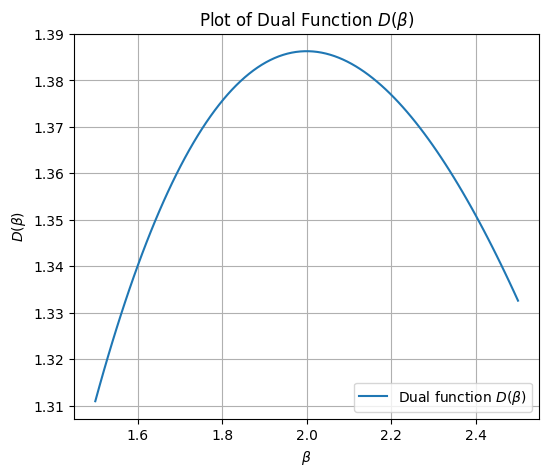

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 定义目标函数 P(x)
def P(x):
    return - np.log(x[0]) -  np.log(x[1])

# 定义约束函数 h(x)
def h(x):
    return  x[0] + x[1] - 1

# 定义拉格朗日函数 L(x, beta)
def L(x, beta):
    return P(x) + beta * h(x)

# 定义双对偶函数 D(beta)，通过在 x 上最小化 L(x, beta) 计算
def dual_function(beta):
    # 定义要最小化的目标函数
    def objective(x):
        return L(x, beta)

    # 初始猜测值 x0，选择一个合理的初始点
    x0 = np.array([0.5, 0.5])

    # 定义约束：x > 0
    bounds = [(1e-5, None), (1e-5, None)]

    # 最小化 L(x, beta) 对 x
    result = minimize(objective, x0, bounds=bounds)

    # 返回 L(x, beta) 的最小值作为 D(beta)
    return result.fun

# 定义 beta 值的范围
beta_values = np.linspace(1.5, 2.5, 100)

# 计算每个 beta 值的 D(beta)
D_values = [dual_function(beta) for beta in beta_values]

# 绘制 D(beta)
plt.figure(figsize=(6, 5))
plt.plot(beta_values, D_values, label='Dual function $D(\\beta)$')
plt.xlabel('$\\beta$')
plt.ylabel('$D(\\beta)$')
plt.title('Plot of Dual Function $D(\\beta)$')
plt.legend()
plt.grid(True)
plt.show()






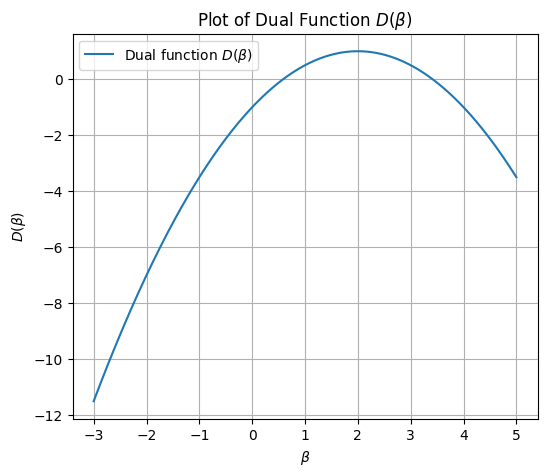

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 定义目标函数 P(x)
def P(x):
    return 0.5 * (x[0]**2 + x[1]**2) + x[0] - x[1]

# 定义约束函数 h(x)
def h(x):
    return -x[0] + 1

# 定义拉格朗日函数 L(x, beta)
def L(x, beta):
    return P(x) + beta * h(x)

# 定义双对偶函数 D(beta)，通过在 x 上最小化 L(x, beta) 计算
def dual_function(beta):
    # 定义要最小化的目标函数
    def objective(x):
        return L(x, beta)

    # 初始猜测值 x0，选择一个合理的初始点
    x0 = np.array([0.0, 0.0])

    # 无约束优化，最小化 L(x, beta) 对 x
    result = minimize(objective, x0)

    # 返回 L(x, beta) 的最小值作为 D(beta)
    return result.fun

# 定义 beta 值的范围
beta_values = np.linspace(-3, 5, 400)

# 计算每个 beta 值的 D(beta)
D_values = [dual_function(beta) for beta in beta_values]

# 绘制 D(beta)
plt.figure(figsize=(6, 5))
plt.plot(beta_values, D_values, label='Dual function $D(\\beta)$')
plt.xlabel('$\\beta$')
plt.ylabel('$D(\\beta)$')
plt.title('Plot of Dual Function $D(\\beta)$')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import minimize

# 定义目标函数 P(x)
def P(x):
    return 0.5 * (x[0]**2 + x[1]**2) + x[0] - x[1]

# 定义约束函数 h(x)
def h(x):
    return -x[0] + 1

# 定义拉格朗日函数 L(x, beta)
def L(x, beta):
    return P(x) + beta * h(x)

# 定义双对偶函数 D(beta)，通过在 x 上最小化 L(x, beta) 计算
def dual_function(beta):
    # 定义要最小化的目标函数
    def objective(x):
        return L(x, beta)

    # 初始猜测值 x0，选择一个合理的初始点
    x0 = np.array([0.0, 0.0])

    # 无约束优化，最小化 L(x, beta) 对 x
    result = minimize(objective, x0)

    # 返回 L(x, beta) 的最小值作为 D(beta)
    return result.fun

# 计算梯度
def numerical_gradient(f, beta, epsilon=1e-7):
    grad = np.zeros_like(beta)
    for i in range(len(beta)):
        beta_plus = np.copy(beta)
        beta_minus = np.copy(beta)
        beta_plus[i] += epsilon
        beta_minus[i] -= epsilon
        grad[i] = (f(beta_plus) - f(beta_minus)) / (2 * epsilon)
    return grad

# 定义 beta 的初始值
beta_init = np.array([0.0])

# 找到使得梯度为零的 beta
result = minimize(lambda beta: np.linalg.norm(numerical_gradient(dual_function, beta)), beta_init)

# 最优的 beta
beta_star = result.x

# 计算在 beta_star 处的梯度
grad_at_beta_star = numerical_gradient(dual_function, beta_star)

print(f"Optimal beta: {beta_star}")
print(f"Gradient at optimal beta: {grad_at_beta_star}")

# 验证梯度是否为零
is_gradient_zero = np.allclose(grad_at_beta_star, 0)
print(f"Is gradient zero at optimal beta? {is_gradient_zero}")


Optimal beta: [1.99999999]
Gradient at optimal beta: [6.66133815e-09]
Is gradient zero at optimal beta? True


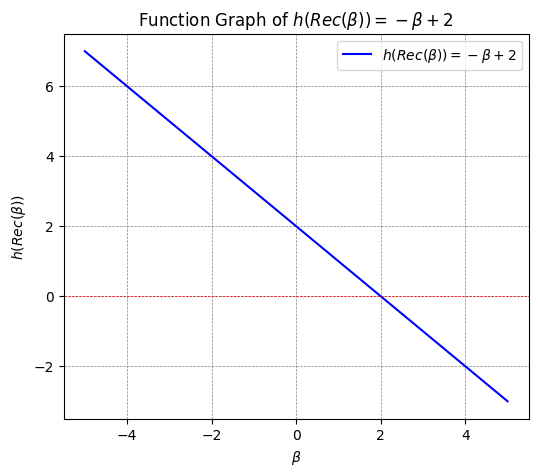

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 定义 beta 的取值范围
beta = np.linspace(-5, 5, 400)

# 计算 h(Rec(beta))
h_Rec_beta = -beta + 2

# 绘制函数图像
plt.figure(figsize=(6, 5))
plt.plot(beta, h_Rec_beta, label='$h(Rec(\\beta)) = -\\beta + 2$', color='blue')

# 添加图例和标签
plt.axhline(0, color='red',linestyle = '--',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Function Graph of $h(Rec(\\beta)) = -\\beta + 2$')
plt.xlabel('$\\beta$')
plt.ylabel('$h(Rec(\\beta))$')
plt.legend()
plt.show()


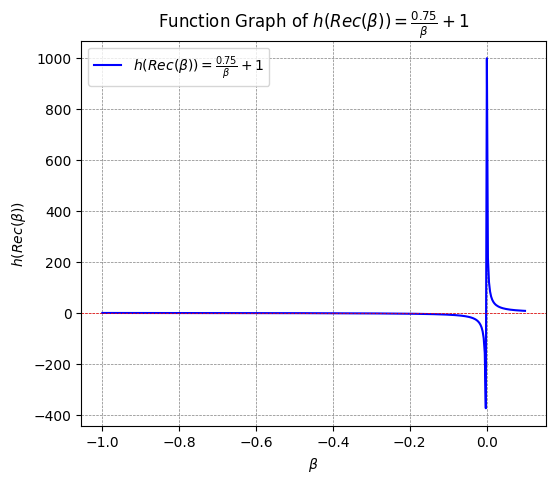

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 定义 beta 的取值范围
beta = np.linspace(-1, 0.1, 400)  # 避免除以0的情况，从0.1开始

# 计算 h(Rec(beta))
if beta != 0:
    h_Rec_beta = 0.75 / beta + 1
else:
    h_Rec_beta = float('inf')


# 绘制函数图像
plt.figure(figsize=(6, 5))
plt.plot(beta, h_Rec_beta, label='$h(Rec(\\beta)) = \\frac{0.75}{\\beta} + 1$', color='blue')

# 添加图例和标签
plt.axhline(0, color='red',linestyle = '--',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Function Graph of $h(Rec(\\beta)) = \\frac{0.75}{\\beta} + 1$')
plt.xlabel('$\\beta$')
plt.ylabel('$h(Rec(\\beta))$')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 定义目标函数 P(x)
def P(x):
    return - np.log(x[0]) -  np.log(x[1])

# 定义约束函数 h(x)
def h(x):
    return  x[0] + x[1] - 1

# 定义拉格朗日函数 L(x, beta)
def L(x, beta):
    return P(x) + beta * h(x)

# 定义双对偶函数 D(beta)，通过在 x 上最小化 L(x, beta) 计算
def dual_function(beta):
    # 定义要最小化的目标函数
    def objective(x):
        return L(x, beta)

    # 初始猜测值 x0，选择一个合理的初始点
    x0 = np.array([0.5, 0.5])

    # 定义约束：x > 0
    bounds = [(1e-5, None), (1e-5, None)]

    # 最小化 L(x, beta) 对 x
    result = minimize(objective, x0, bounds=bounds)

    # 返回 L(x, beta) 的最小值作为 D(beta)
    return result.fun

# 定义 beta 值的范围
beta_values = np.linspace(1.5, 2.5, 100)

# 计算每个 beta 值的 D(beta)
D_values = [dual_function(beta) for beta in beta_values]

# 找到 D(beta) 的最大值及对应的 beta 值
max_D_value = np.max(D_values)
arg_max_beta = beta_values[np.argmax(D_values)]

print(f"最大的双对偶函数值 D(β) = {max_D_value}")
print(f"使 D(β) 达到最大值的 β 值为 {arg_max_beta}")

# 找到 S^D_* = arg max D(β) 的值，可能有多个最大值
arg_max_indices = np.where(D_values == max_D_value)[0]
S_D_star = beta_values[arg_max_indices]

print(f"S^D_* = {S_D_star}")





最大的双对偶函数值 D(β) = 1.386287994934806
使 D(β) 达到最大值的 β 值为 2.005050505050505
S^D_* = [2.00505051]


最大的双对偶函数值 D(β) = 0.999540863177227
使 D(β) 达到最大值的 β 值为 2.0303030303030303
对应的最小化 x 值为 [1.03030302 0.99999999]
P值 1.0610651786447578
S^D_* = [2.03030303]


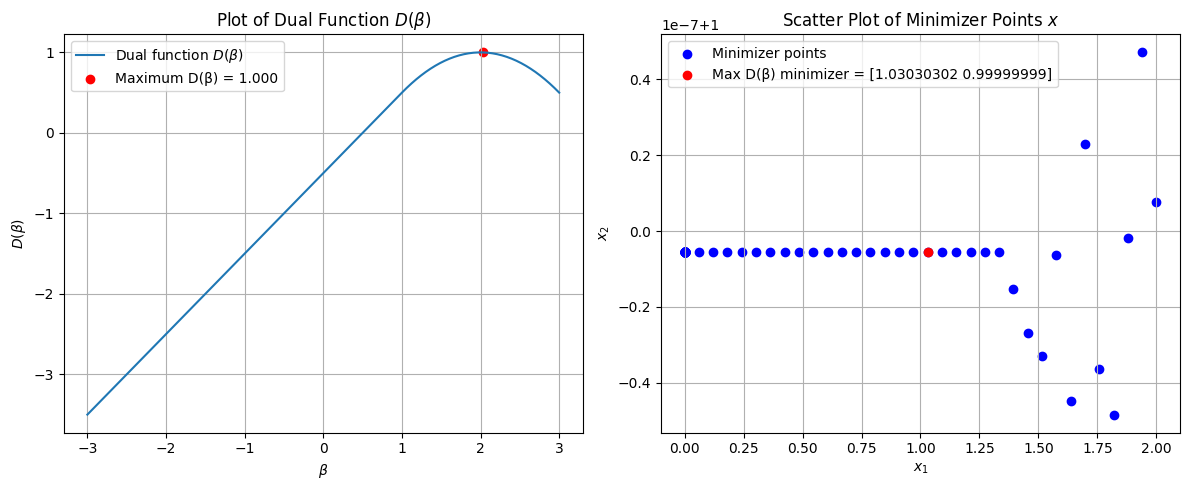

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 定义目标函数 P(x)
def P(x):
     return 0.5 * (x[0]**2 + x[1]**2) + x[0] - x[1]

# 定义约束函数 h(x)
def h(x):
    return   - x[0] + 1

# 定义拉格朗日函数 L(x, beta)
def L(x, beta):
    return P(x) + beta * h(x)

# 定义双对偶函数 D(beta)，通过在 x 上最小化 L(x, beta) 计算
def dual_function(beta):
    # 定义要最小化的目标函数
    def objective(x):
        return L(x, beta)

    # 初始猜测值 x0，选择一个合理的初始点
    x0 = np.array([0.5, 0.5])

    # 定义约束：x > 0
    bounds = [(1e-5, None), (1e-5, None)]

    # 最小化 L(x, beta) 对 x
    result = minimize(objective, x0, bounds=bounds)

    # 计算最小化 L(x, beta) 对应的 P(x)
    x_minimizer = result.x
    P_value = P(x_minimizer)

    # 返回 L(x, beta) 的最小值作为 D(beta)，以及对应的 P(x) 值
    return result.fun, P_value, x_minimizer

# 定义 beta 值的范围
beta_values = np.linspace(-3, 3, 100)

# 计算每个 beta 值的 D(beta) 和对应的 P(x) 及使其最小化的 x 值
D_values = []
P_values = []
minimizer_points = []

for beta in beta_values:
    D_val, P_val, minimizer = dual_function(beta)
    D_values.append(D_val)
    P_values.append(P_val)
    minimizer_points.append(minimizer)

# 找到 D(beta) 的最大值及对应的 beta 值
max_D_value = np.max(D_values)
arg_max_beta = beta_values[np.argmax(D_values)]
arg_max_minimizer = minimizer_points[np.argmax(D_values)]

print(f"最大的双对偶函数值 D(β) = {max_D_value}")
print(f"使 D(β) 达到最大值的 β 值为 {arg_max_beta}")
print(f"对应的最小化 x 值为 {arg_max_minimizer}")
print("P值",P(arg_max_minimizer))

# 找到 S^D_* = arg max D(β) 的值，可能有多个最大值
arg_max_indices = np.where(D_values == max_D_value)[0]
S_D_star = beta_values[arg_max_indices]

print(f"S^D_* = {S_D_star}")

# 绘制 D(beta) 和 P(x) 的图像
plt.figure(figsize=(12, 5))

# 绘制 D(beta) 的图像
plt.subplot(1, 2, 1)
plt.plot(beta_values, D_values, label='Dual function $D(\\beta)$')
plt.scatter(arg_max_beta, max_D_value, color='red', label=f'Maximum D(β) = {max_D_value:.3f}')
plt.xlabel('$\\beta$')
plt.ylabel('$D(\\beta)$')
plt.title('Plot of Dual Function $D(\\beta)$')
plt.legend()
plt.grid(True)

# 绘制 P(x) 的图像
plt.subplot(1, 2, 2)
plt.scatter([p[0] for p in minimizer_points], [p[1] for p in minimizer_points], label='Minimizer points', color='blue')
plt.scatter(arg_max_minimizer[0], arg_max_minimizer[1], color='red', label=f'Max D(β) minimizer = {arg_max_minimizer}')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatter Plot of Minimizer Points $x$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
